In [3]:
# Check actual column names in your dataset
print("Columns in dataset:\n", df.columns.tolist())


Columns in dataset:
 ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


Saving Netflix Dataset.csv to Netflix Dataset (1).csv
 Dataset loaded successfully!

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration     

/tmp/ipython-input-687366522.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-687366522.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

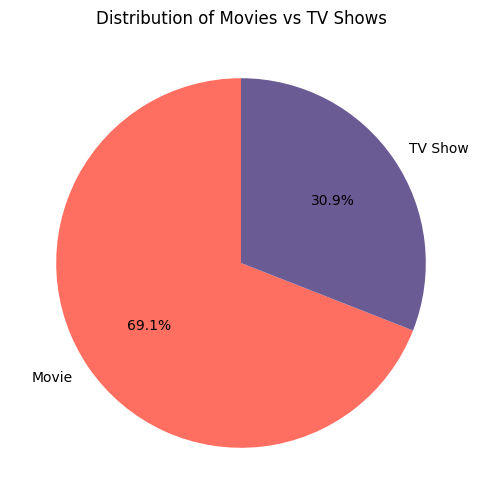

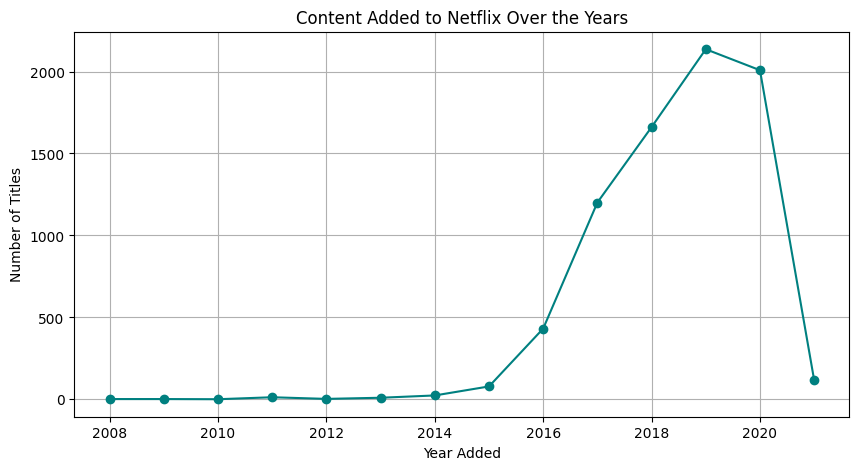

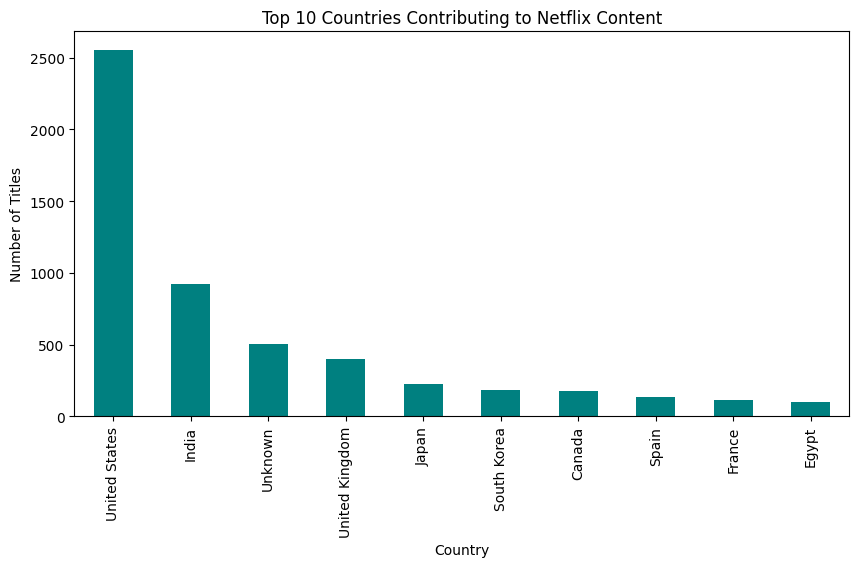

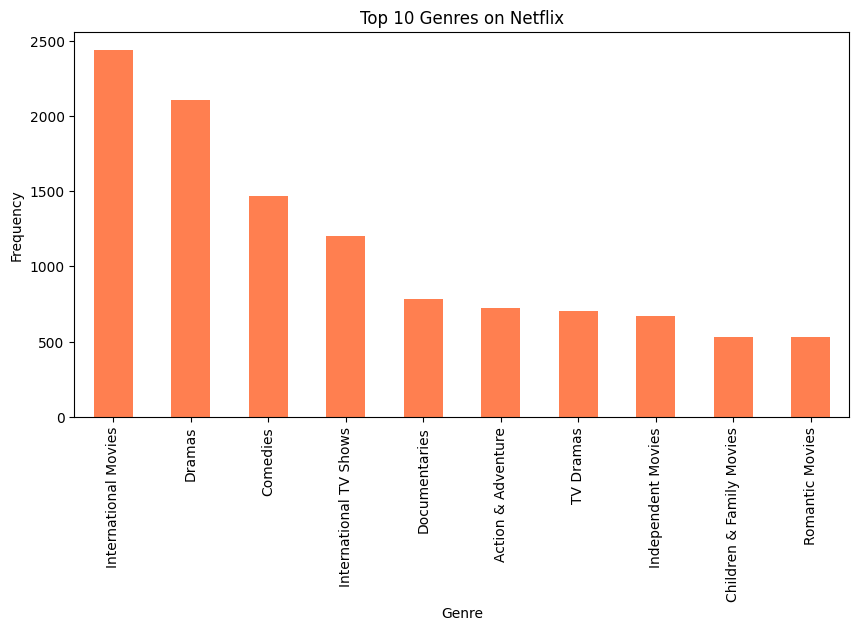

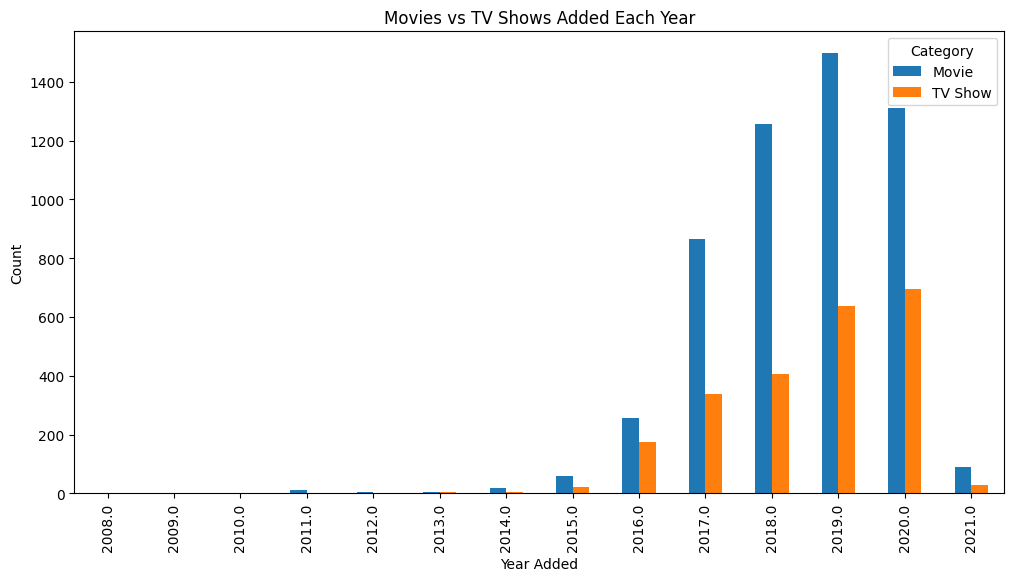

 Insights Summary:

1️ Netflix currently has more Movie than TV Show.
2️ Content additions increased significantly in recent years — indicating expansion of original productions.
3️ Top contributing countries:
 Country
United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64
4️ Popular genres:
 ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries', 'Action & Adventure', 'TV Dramas', 'Independent Movies', 'Children & Family Movies', 'Romantic Movies']

 Strategic Recommendations:
- Increase content diversity from underrepresented countries.
- Invest in trending genres like Drama, Comedy, and Documentaries.
- Maintain a healthy mix between Movies and TV Shows.
- Leverage data-driven insights to guide future content acquisition and production strategies.


In [4]:

# Step 1: Upload dataset (if not already loaded)
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Upload CSV file
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded.keys())))
print(" Dataset loaded successfully!\n")

# Step 2: Basic Info
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Step 3: Clean Data
df.drop_duplicates(inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)
df['Release_Date'].fillna('Unknown', inplace=True)

# Extract release year
df['year_added'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Step 4: Exploratory Data Analysis (EDA)

## 4.1 Movies vs TV Shows
type_counts = df['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6F61','#6B5B95'])
plt.title("Distribution of Movies vs TV Shows")
plt.show()

## 4.2 Content Added Over the Years
yearly_trend = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='teal')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

## 4.3 Top 10 Contributing Countries
country_count = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
country_count.plot(kind='bar', color='teal')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

## 4.4 Top 10 Genres
genre_list = df['Type'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_genres.plot(kind='bar', color='coral')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

## 4.5 Trend of Movies vs TV Shows Over the Years
content_trend = df.groupby(['year_added', 'Category']).size().unstack(fill_value=0)
content_trend.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Movies vs TV Shows Added Each Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

# Step 5: Insights & Recommendations
print(" Insights Summary:\n")
print(f"1️ Netflix currently has more {type_counts.idxmax()} than {type_counts.idxmin()}.")
print("2️ Content additions increased significantly in recent years — indicating expansion of original productions.")
print("3️ Top contributing countries:\n", country_count)
print("4️ Popular genres:\n", top_genres.index.tolist())

print("\n Strategic Recommendations:")
print("- Increase content diversity from underrepresented countries.")
print("- Invest in trending genres like Drama, Comedy, and Documentaries.")
print("- Maintain a healthy mix between Movies and TV Shows.")
print("- Leverage data-driven insights to guide future content acquisition and production strategies.")
